Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
data=pd.read_csv("taxi.csv")
data.head(15)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.000,-1.000,Standard,business,1
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0
8,493006,5,20,6080,753429,55.818748,37.338240,55.835764,37.294710,6.222,15.433,Economy,private,0
9,953983,6,7,6080,533820,55.839155,37.251947,55.833198,37.312197,10.410,23.083,Economy,private,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [4]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


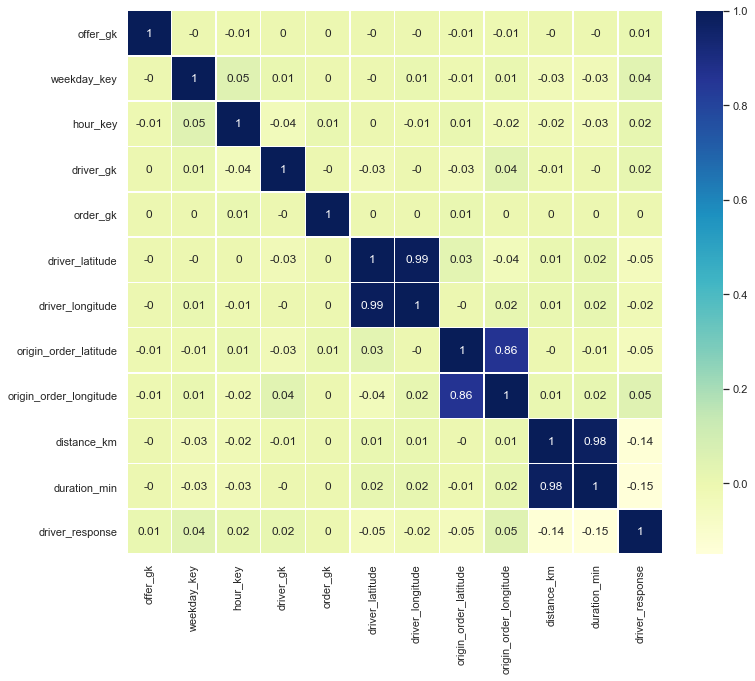

In [5]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data=data.corr().round(2), annot=True,linewidths=0.5, cmap="YlGnBu")

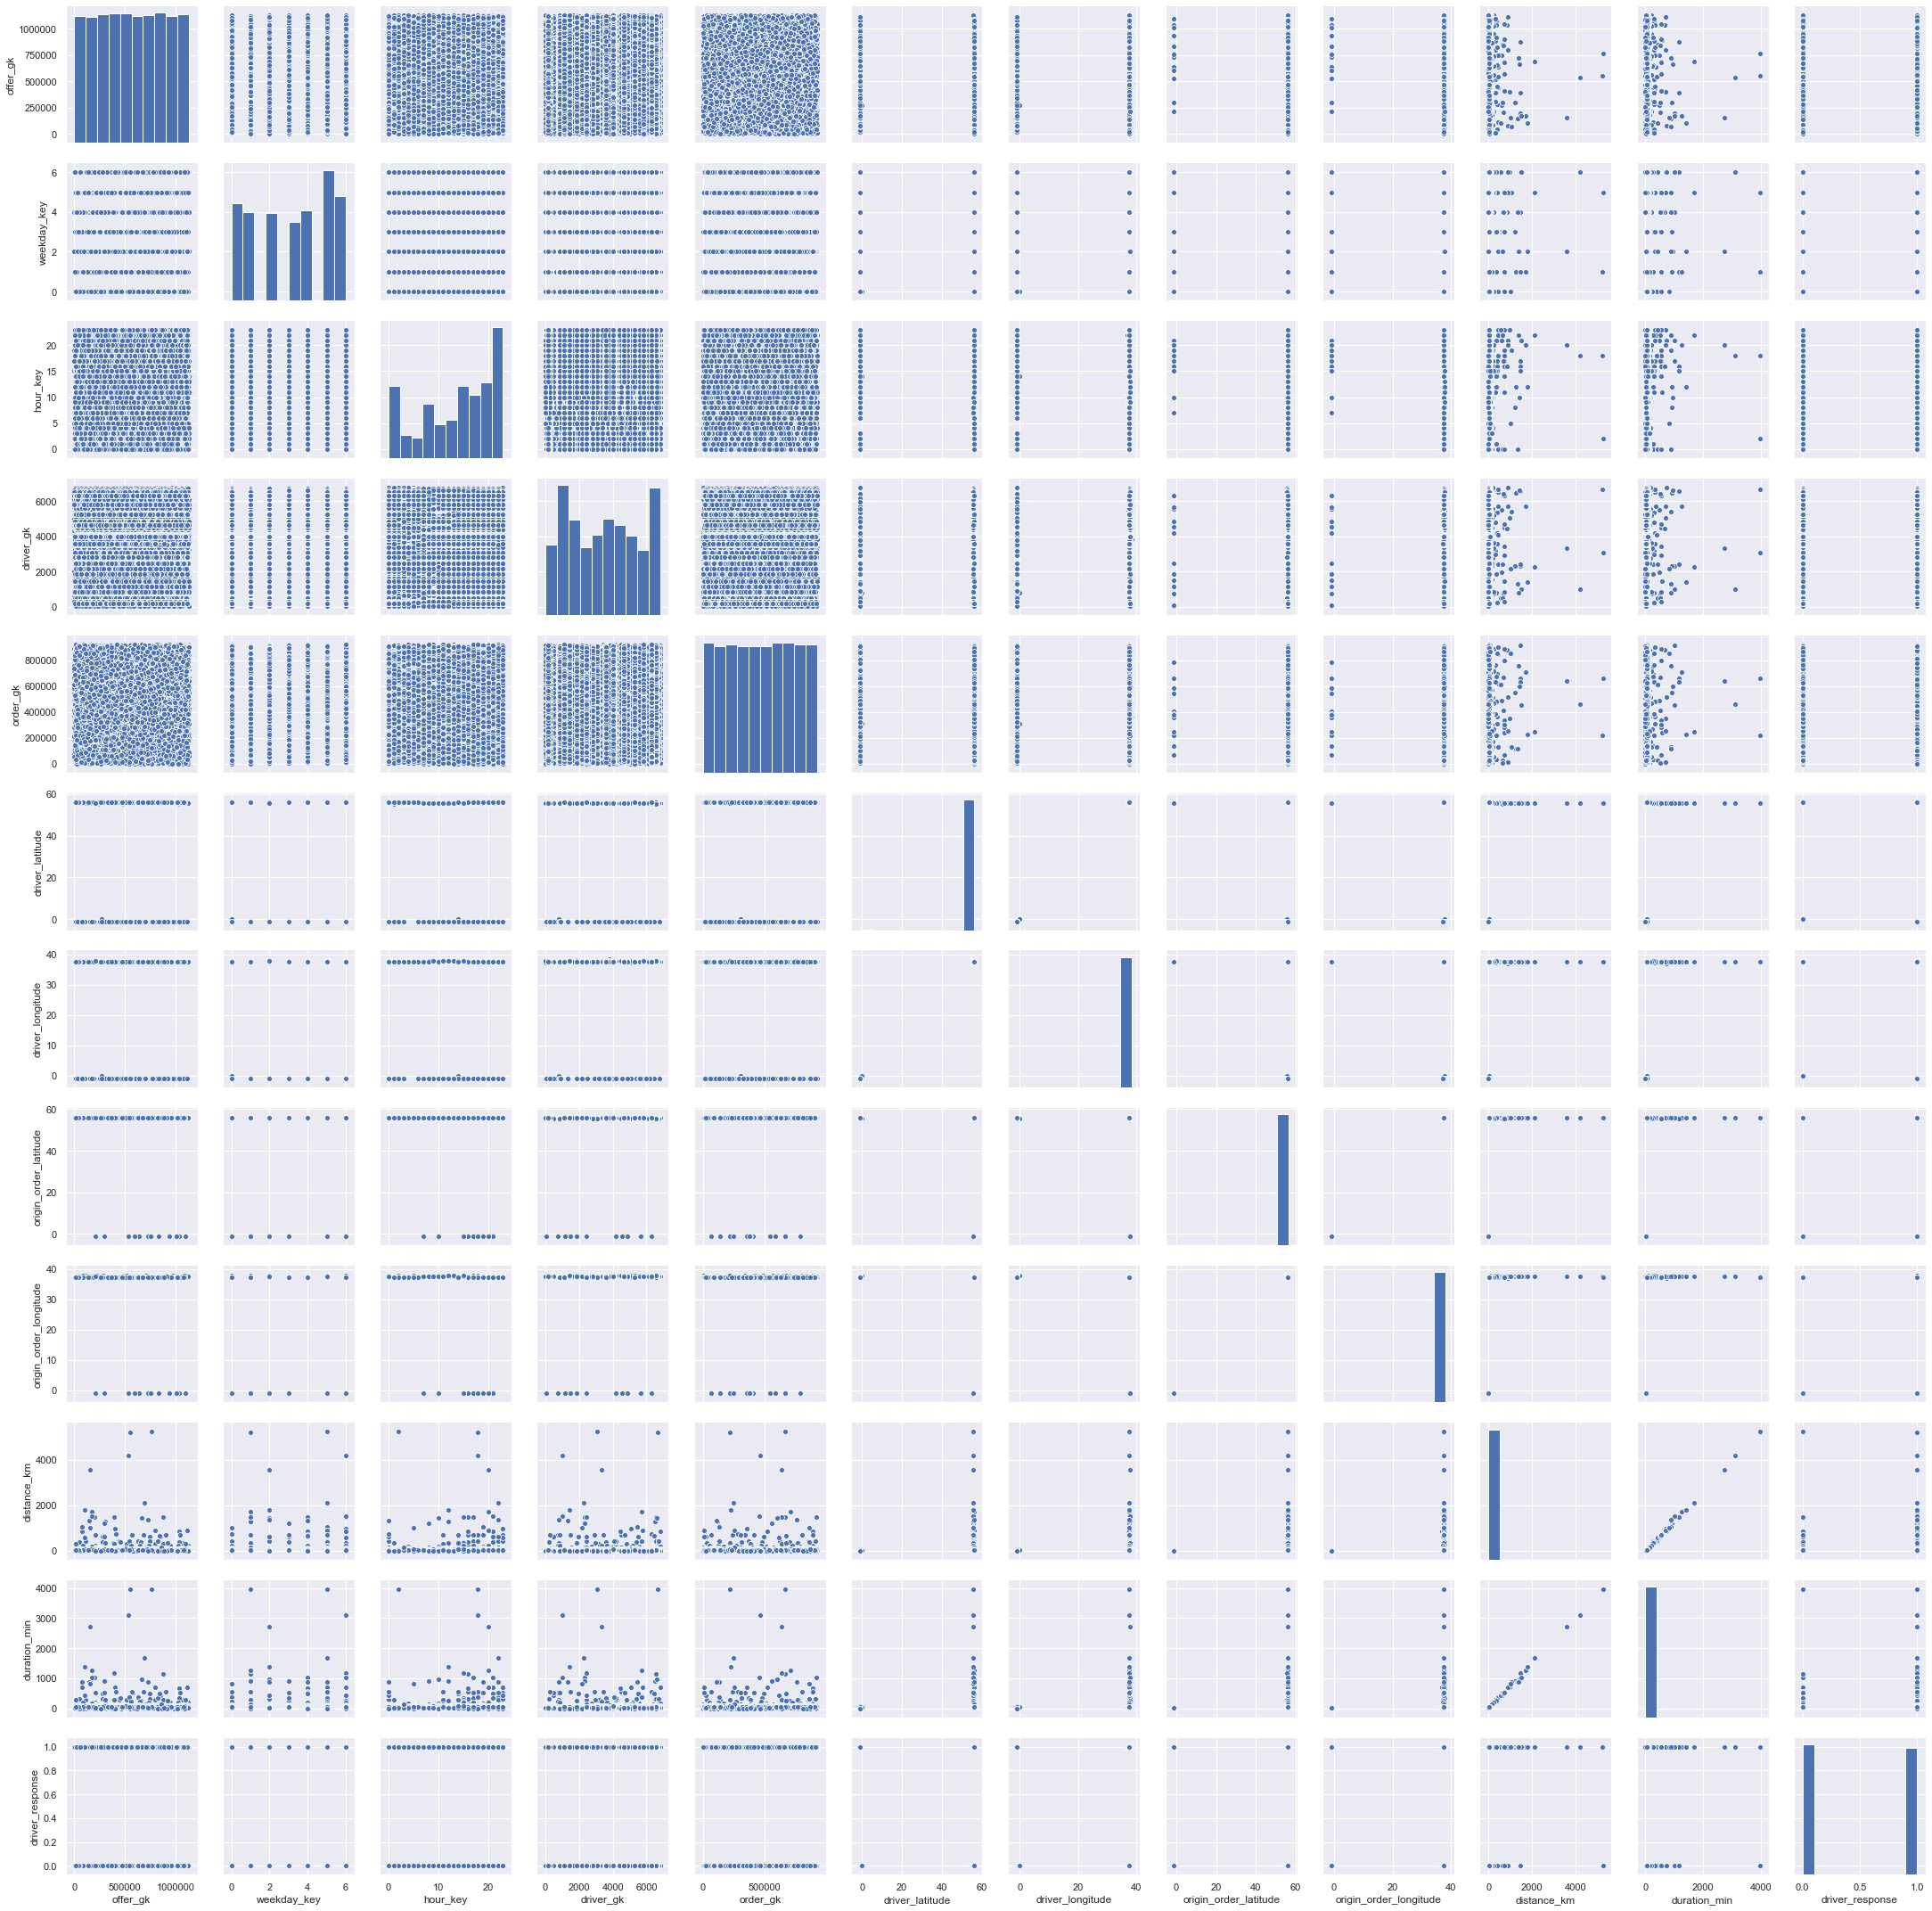

In [6]:
sns.pairplot(data)

-------------------------------------------------------------------------------



In [7]:
data['offer_class_group'].unique()

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

тут вроде все понятно кроме ТЕСТ

In [8]:
data['ride_type_desc'].unique()

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

тут вопросы ко всем кроме приват

In [9]:
data[data['offer_class_group'] == 'Test'].shape

(8, 14)

можно удалить скорее всего это проверка

In [10]:
data[data['ride_type_desc'] == 'affiliate'].shape

(224, 14)

вот этих тоже маловато для выборки 100 000, но пока не буду трогать

In [11]:
data[data['ride_type_desc'] == 'business'].shape

(8533, 14)

тут все ок

In [12]:
data[data['ride_type_desc'] == 'SMB'].shape

(36, 14)

In [13]:
data[data['ride_type_desc'] == 'SMB']

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
3181,515011,4,14,1514,573660,55.679113,37.563873,55.681456,37.560491,5.593,17.517,Economy,SMB,1
7459,740895,4,18,1186,216586,55.828397,37.763599,55.839510,37.746035,23.270,44.667,Economy,SMB,1
8660,455304,3,17,3303,360015,55.781449,37.697605,55.777739,37.698990,-1.000,-1.000,Economy,SMB,1
12092,849177,5,20,3763,83260,55.820917,37.650258,55.827038,37.660981,-1.000,-1.000,Test,SMB,0
13891,102542,3,9,6450,532434,55.686647,37.572028,55.676650,37.559384,12.060,25.783,Economy,SMB,1
18054,1115050,5,13,4014,134774,55.678207,37.580621,55.681456,37.560491,5.300,17.033,Economy,SMB,1
19067,495538,3,22,2221,671093,55.544830,37.563338,55.548082,37.534335,23.995,36.467,Economy,SMB,1
21925,575946,6,1,2939,887084,55.666110,37.484688,55.661958,37.476465,15.449,21.600,Economy,SMB,1
25651,386998,3,23,4100,126932,55.961238,37.413188,55.962322,37.407117,51.891,53.517,Economy,SMB,0
26819,755014,3,23,1793,126932,55.962122,37.409464,55.962322,37.407117,51.891,53.517,Economy,SMB,0


не смог понять что за SMB но я их тоже удалю, их мало  там есть те самые тестовые, так что закладывается подозрения что это нам не нужно, и их очень мало.

In [14]:
test=data[data['distance_km'] > 400]
test.shape

(46, 14)

максимально значение было 5234.283000, и это сто проц выброс.но я подумал что впринципе такси от 400 км тож странно и их не много думаю что могу удалить

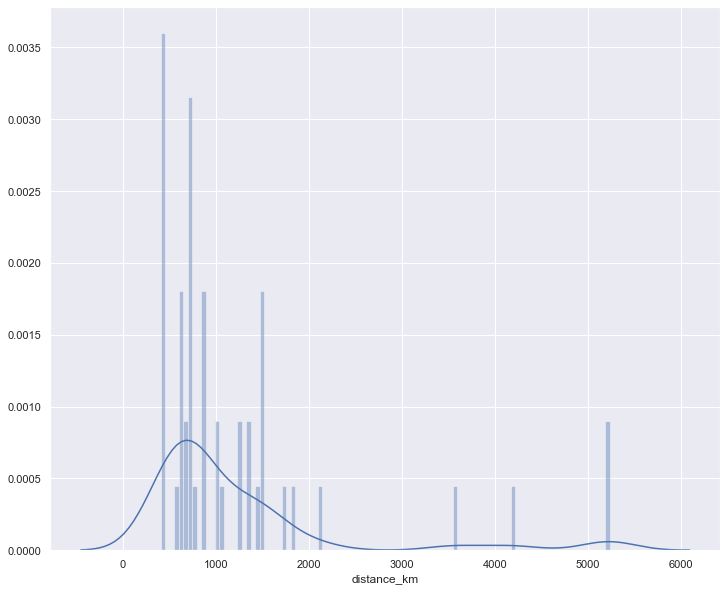

In [15]:
sns.distplot(test['distance_km'], bins=100)
plt.show()

In [16]:
test=data[data['distance_km'] == 0]
test.shape

(152, 14)

нулевая дистанция оч странная штука думаю что можно удалить, и снова же их не много

In [17]:
test.head(15)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
859,346101,4,12,4215,70206,55.758458,37.710545,55.747802,37.715600,0.0,0.0,Economy,private,1
1179,166480,5,8,1706,234100,55.787066,37.563235,55.792505,37.563787,0.0,0.0,Economy,private,1
2435,839922,3,12,6792,845047,55.415367,37.898310,55.410307,37.902451,0.0,0.0,Standard,private,1
2918,904433,5,18,1514,228992,55.681763,37.480773,55.671333,37.464131,0.0,0.0,Standard,private,0
3357,149416,4,6,4269,401598,55.961844,37.409798,55.961995,37.406355,0.0,0.0,Economy,private,0
4451,497719,5,18,5187,402236,55.816717,37.715013,55.814618,37.647611,0.0,0.0,Kids,private,1
4737,589558,4,10,5187,658003,55.811489,37.707579,55.817693,37.707251,0.0,0.0,Economy,private,1
4810,581796,6,19,5187,329644,55.815785,37.707118,55.813621,37.704787,0.0,0.0,Economy,private,1
5283,233795,3,15,3277,474450,55.800215,37.471278,55.788713,37.453311,0.0,0.0,Economy,private,1
7325,285244,6,1,1186,105661,55.753964,37.821489,55.750772,37.796145,0.0,0.0,Standard,private,1


на всякий проверил данные по нулевым дистаницям

In [18]:
test=data[data['distance_km'] < 0]
test.shape

(26207, 14)

ооооо! этих прям оч много, удалять их нельзя

In [19]:
test.head(10)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.0,-1.0,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.0,-1.0,Economy,private,1
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.0,-1.0,Standard,business,1
19,533917,5,8,6080,596531,55.913718,37.401395,55.921554,37.403505,-1.0,-1.0,Standard,business,0
21,123897,4,12,6080,185909,55.766763,37.607275,55.772388,37.606330,-1.0,-1.0,Standard,business,0
28,552307,5,14,6080,408032,55.833520,37.408453,55.820369,37.446565,-1.0,-1.0,Standard,private,0
31,275040,4,7,6080,290066,55.913695,37.402437,55.906912,37.400428,-1.0,-1.0,Economy,private,0
32,73289,6,20,6080,106021,55.697348,37.549872,55.687560,37.543886,-1.0,-1.0,Standard,business,1
34,510200,5,23,6080,7313,55.783018,37.578878,55.783577,37.560083,-1.0,-1.0,Economy,private,0
36,1129673,6,17,6080,915127,55.850250,37.414420,55.856518,37.428684,-1.0,-1.0,Economy,private,0


много вариантов в голове что это может быть, но самый вероятный что это просто вызов такси без указания конечной точки назначения. так что эти данные оставляем, наверно.

In [20]:
test=data[data['driver_longitude'] < 0]
test.shape

(140, 14)

позиция водилы не определена

In [21]:
test.head(14)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
565,638186,5,14,6272,817074,-1.0,-1.0,55.908664,37.597781,-1.000,-1.00,Standard,business,1
2111,567790,1,12,6792,820788,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2129,302376,1,1,6792,548327,-1.0,-1.0,55.415361,37.898917,83.923,81.35,Standard,business,1
2137,427612,6,21,6792,32158,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2142,202875,6,3,6792,346671,-1.0,-1.0,55.415361,37.898917,70.529,65.00,Standard,business,1
2145,845726,6,0,6792,552732,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2183,177029,0,17,6792,658177,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2191,10275,3,11,6792,92302,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2221,1039638,5,22,6792,378336,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2268,378336,1,11,6792,354709,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1


In [22]:
test['ride_type_desc'].unique()


array(['business', 'private'], dtype=object)

In [23]:
test['driver_response'].unique()

array([1], dtype=int64)

100% соглашение)

In [24]:
test[test['ride_type_desc'] == 'private'].shape


(10, 14)

In [25]:
test[test['ride_type_desc'] == 'private'].head(10)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
6337,799810,5,20,6299,819406,-1.0,-1.0,55.414400,37.896652,34.004,37.700,Standard,private,1
14867,610641,5,20,4245,457967,-1.0,-1.0,55.414400,37.896652,39.508,44.717,Economy,private,1
19821,539207,3,23,3633,240088,-1.0,-1.0,55.758781,37.556659,40.973,53.450,Economy,private,1
34347,463272,2,15,3292,507071,-1.0,-1.0,55.410307,37.902451,45.008,45.700,Economy,private,1
47444,250748,6,13,3833,46252,-1.0,-1.0,55.620232,37.505467,83.026,71.217,Economy,private,1
48032,874493,0,11,3525,917874,-1.0,-1.0,55.410307,37.902451,83.491,76.617,Economy,private,1
64818,1071224,2,16,5955,659008,-1.0,-1.0,55.829640,37.350692,-1.000,-1.000,Premium,private,1
65879,90292,2,8,2954,33663,-1.0,-1.0,55.843950,37.364569,21.160,25.200,Economy,private,1
66572,636980,3,6,860,325741,-1.0,-1.0,55.672890,37.542425,34.225,43.383,Standard,private,1
81694,698969,6,6,2470,862514,-1.0,-1.0,55.699097,37.317988,41.576,43.550,Standard,private,1


тут как обычно масса вариантов, но думаю что это вызов конкретного водителя. или вызов к определенному времени типо заказали еще неделю назад. думаю чтто данные можно оставить. решал дальше и сначала подумал преобразовать в признак добавив бинарный столбец ал-я вызов конкретного водителя, а потом понял что эти данные нам не нужны, так что я их тоже удалю.

In [134]:
test=data[data['driver_longitude'] == 0]
test.shape

(1, 14)

это удалим, координаты водителя не определены

In [135]:
test=data[data['origin_order_latitude'] == 0]
test.shape

(0, 14)

In [87]:
test=data[data['origin_order_latitude'] < 0]
test.shape

(13, 14)

In [27]:
test

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
1687,760201,6,17,1479,217451,55.730637,37.491326,-1.0,-1.0,2.942,6.300,Economy,private,1
9407,729617,1,21,1835,404650,55.484133,37.850971,-1.0,-1.0,-1.000,-1.000,Standard,private,0
43328,1033378,3,10,5586,386108,55.762383,37.772572,-1.0,-1.0,14.127,21.433,Economy,private,1
43688,299807,3,18,14,69484,55.640164,37.534014,-1.0,-1.0,9.998,22.133,Standard,private,1
51365,833482,0,20,75,782429,55.619920,37.395172,-1.0,-1.0,28.607,32.967,Economy,private,0
56004,1009826,3,19,4185,247078,55.758792,37.749308,-1.0,-1.0,11.281,21.167,Economy,private,1
58769,212838,2,7,6304,542162,55.638462,37.335678,-1.0,-1.0,48.557,47.300,Economy,private,0
60245,753313,1,16,1168,583148,55.984804,37.159184,-1.0,-1.0,-1.000,-1.000,Economy,private,1
64117,936069,5,15,737,139197,55.753351,37.667157,-1.0,-1.0,2.252,7.400,Standard,private,1
64694,1095202,3,20,5669,659570,55.741113,37.618121,-1.0,-1.0,7.199,20.200,Premium,private,1


эти удалим. координаты заказчика не определены

In [80]:
import math

In [87]:
def distance(row):
    return  (2*6371*math.asin(math.sqrt(pow(math.sin((((row['driver_latitude']-row['origin_order_latitude'])/180)*math.pi)/2),2)+pow(math.sin((((row['driver_longitude']-row['origin_order_longitude'])/180)*math.pi)/2),2)*math.cos(((row['driver_latitude']/180)*math.pi))*math.cos((row['origin_order_latitude']/180)*math.pi))))

In [132]:
data['distance_driver_origin'] = data.apply(distance, axis=1)

In [137]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,distance_driver_origin
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0,1.363045
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,3.413092
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,0.409999
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1,0.647472
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,1.062481


формулу нашел на сайте геодезистов (но я ее не проверял). по формуле посчитали дистанцию между водителем и клиентом.
дистанция это конечно хорошо но совсем было бы круто подключить апи, что бы показывал не дистанцию а длину пути, но не умею)

In [133]:
data.drop(data[data['offer_class_group'] == 'Test'].index, inplace=True)
data.drop(data[data['ride_type_desc'] == 'SMB'].index, inplace=True)
data.drop(data[data['distance_km'] > 400].index, inplace=True)
data.drop(data[data['distance_km'] == 0].index, inplace=True)
data.drop(data[data['driver_longitude'] <= 0].index, inplace=True)
data.drop(data[data['origin_order_latitude'] <= 0].index, inplace=True)

In [134]:
data.drop(['order_gk','offer_gk','driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'], axis=1, inplace=True)

In [135]:
data.shape

(99612, 9)

удалил выбросы и ненужные колонки

In [136]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [137]:
data['offer_class_group']= le.fit_transform(data['offer_class_group'])
data['ride_type_desc']= le.fit_transform(data['ride_type_desc'])

In [94]:
data.head()

,weekday_key,hour_key,driver_gk,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,distance_driver_origin
0,5,20,6080,-1.000,-1.000,1,2,0,1.363045
1,5,14,6080,18.802,25.217,4,2,1,3.413092
2,6,14,6080,6.747,9.800,1,2,0,0.409999
3,2,6,6080,-1.000,-1.000,1,2,1,0.647472
4,4,16,6080,12.383,19.250,1,2,1,1.062481


преобразовал категорийные признаки (offer_class_group, ride_type_desc) с помощью  Label Encoding

In [96]:
data.describe()

,weekday_key,hour_key,driver_gk,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,distance_driver_origin
count,99612.000000,99612.000000,99612.000000,99612.000000,99612.000000,99612.000000,99612.000000,99612.000000,99612.000000
mean,3.159900,13.827179,3445.263151,17.881324,22.781343,2.483616,1.911145,0.491597,0.988387
std,2.054666,7.307796,2038.754162,20.810141,21.094965,1.532520,0.292332,0.499932,0.947517
min,0.000000,0.000000,14.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,1421.000000,-1.000000,-1.000000,1.000000,2.000000,0.000000,0.404335
50%,3.000000,16.000000,3506.000000,10.466000,19.783000,2.000000,2.000000,0.000000,0.652473
75%,5.000000,20.000000,5242.000000,30.698000,37.883000,4.000000,2.000000,1.000000,1.316704
max,6.000000,23.000000,6806.000000,390.695000,330.817000,7.000000,2.000000,1.000000,22.293496


возможно с дистаницей поездки -1 и временем поездки -1 надо будет что то делать но пока так проверю

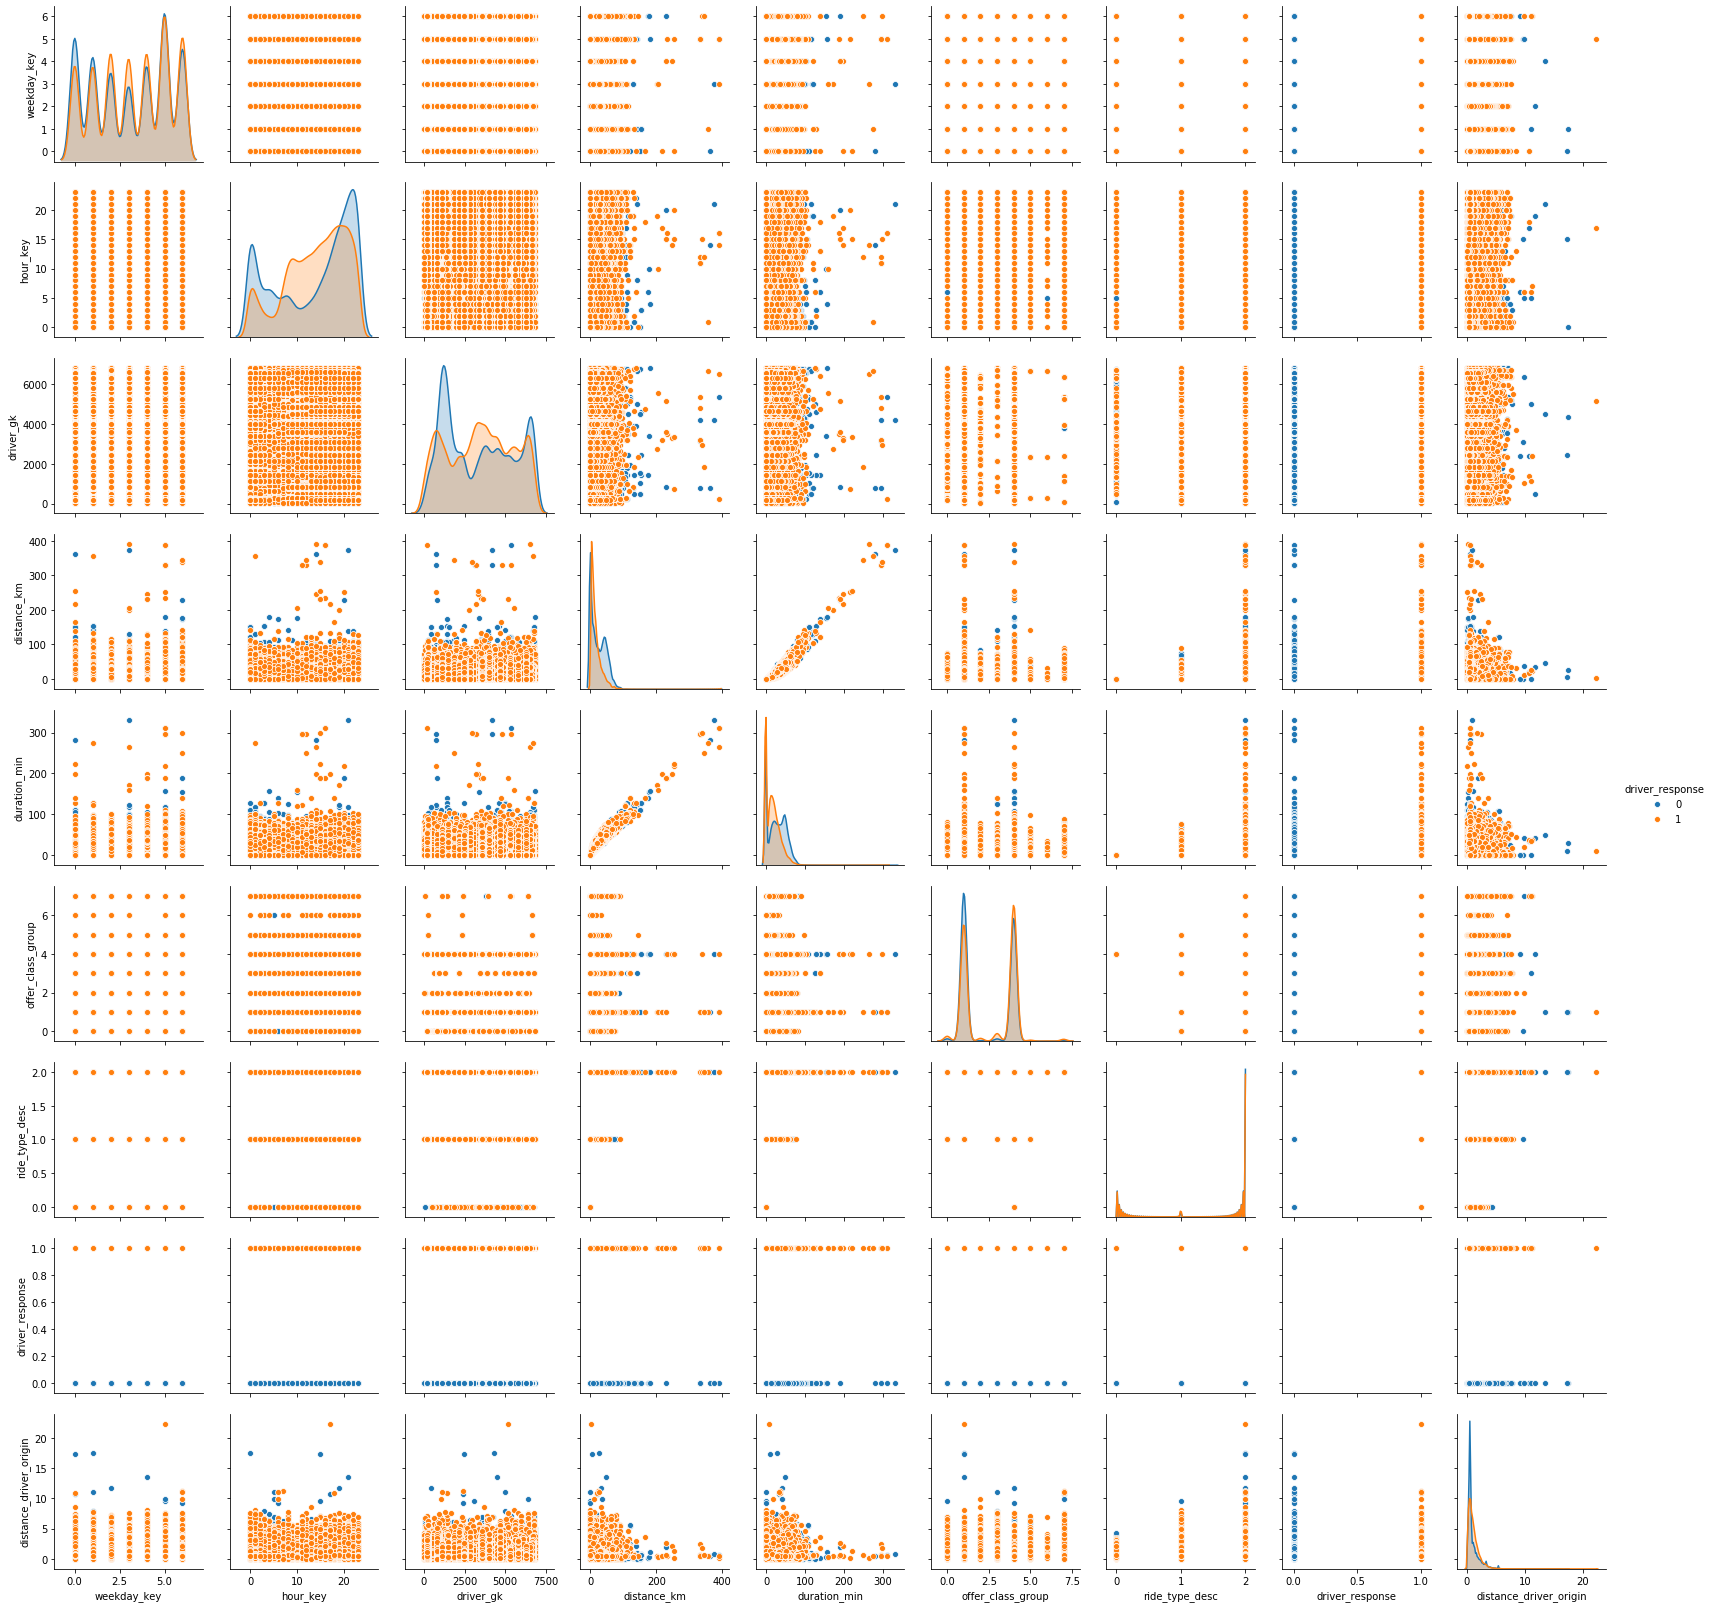

In [97]:
sns.pairplot(data, hue="driver_response")

решил посмотреть на паирплот и разделением принял, не принял. не вижу ничего за что можно было бы зацепиться

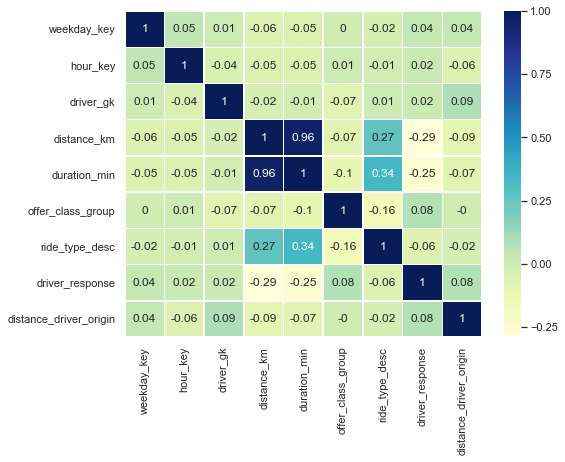

In [98]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(data=data.corr().round(2), annot=True,linewidths=0.5, cmap="YlGnBu")

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [100]:
rfc = RandomForestClassifier(n_estimators=200)

In [116]:
X = data.drop(['driver_response'], axis=1)
Y = data['driver_response']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 24)

In [117]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
rfc.score(X_test, Y_test)

0.7721728655322994

точность 77% думаю что уже норм, но хочется проверить на данных без дистанции == -1

In [122]:
data.drop(data[data['distance_km'] < 0].index, inplace=True)

In [123]:
data.shape

(73546, 9)

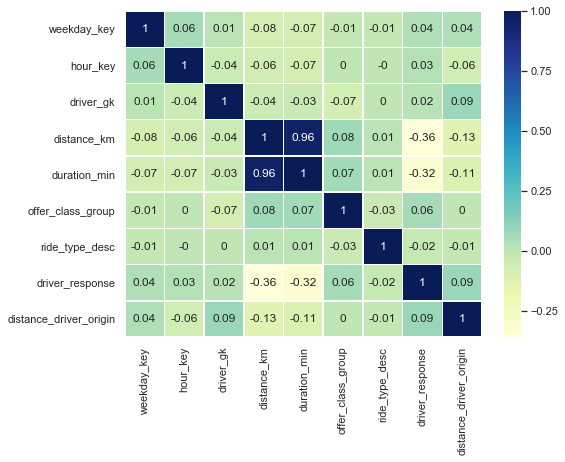

In [124]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(data=data.corr().round(2), annot=True,linewidths=0.5, cmap="YlGnBu")

видно что вырасла корреляция ответа с расстоянием

In [125]:
X = data.drop(['driver_response'], axis=1)
Y = data['driver_response']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 24)

In [126]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
rfc.score(X_test, Y_test)

0.7658055744391571

In [141]:
data.shape

(99612, 9)

In [143]:
X = data.drop(['driver_response','duration_min'], axis=1)
Y = data['driver_response']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 24)

In [144]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
rfc.score(X_test, Y_test)

0.7769914169552778

тут я решил не брать в расчет время поездки так как у растояния поездки и минут поездки кореляция практически равна 1.
модель стала чуть точее и быстрее